In [ ]:
#reading the file
import pandas as pd
df = pd.read_excel('data_hep.xlsx')
print('Dimensions of the dfset are: ',df.shape) 
print(df.columns) #column names
print(df.head(n=5)) #to check that it has been read properly

Dimensions of the dataset are:  (70606, 61)
Index(['Unnamed: 0', 'R2', 'thrustBm', 'thrustOm', 'cosTBTO', 'cosTBz',
       'KSFWVariables__boet__bc', 'KSFWVariables__bomm2__bc',
       'CleoConeCS__bo1__bc', 'CleoConeCS__bo2__bc', 'CleoConeCS__bo3__bc',
       'CleoConeCS__bo4__bc', 'CleoConeCS__bo5__bc', 'CleoConeCS__bo6__bc',
       'CleoConeCS__bo7__bc', 'CleoConeCS__bo8__bc', 'CleoConeCS__bo9__bc',
       'CleoConeCS__bo1__cmROE__bc', 'CleoConeCS__bo2__cmROE__bc',
       'CleoConeCS__bo3__cmROE__bc', 'CleoConeCS__bo4__cmROE__bc',
       'CleoConeCS__bo5__cmROE__bc', 'CleoConeCS__bo6__cmROE__bc',
       'CleoConeCS__bo7__cmROE__bc', 'CleoConeCS__bo8__cmROE__bc',
       'CleoConeCS__bo9__cmROE__bc', 'KSFWVariables__bohso00__bc',
       'KSFWVariables__bohso02__bc', 'KSFWVariables__bohso04__bc',
       'KSFWVariables__bohso10__bc', 'KSFWVariables__bohso12__bc',
       'KSFWVariables__bohso14__bc', 'KSFWVariables__bohso20__bc',
       'KSFWVariables__bohso22__bc', 'KSFWVariables__bohso

In [58]:
#reading the file
import pandas as pd
df = pd.read_excel('data_hep.xlsx')
print('Dimensions of the dataset are: ',df.shape) 



Dimensions of the dataset are:  (70606, 61)


In [5]:
#counts of each event type
print(data['type'].value_counts()) 

type
1    35303
2    23333
3     8172
4     1879
5     1457
0      462
Name: count, dtype: int64


In [ ]:
#binary classification: event_types(0,1--> signal assign value 1) and event_types(2,3,4,5--> background assign value 0)
data['binary_type'] = data['type'].apply(lambda x: 1 if x in [0, 1] else 0)
print(data['binary_type'].value_counts())
#value_counts(normalize=False) --> default disp numbers
#print(data['binary_type'].value_counts(normalize=True))--> rel freq

binary_type
1    35765
0    34841
Name: count, dtype: int64
binary_type
1    0.506543
0    0.493457
Name: proportion, dtype: float64


In [ ]:
#cleaning the data 
drop_col = []  # we don't want to include columns like the first one (unnamed)

for name in data.columns:
    if 'Unnamed' in name or name == '':
        drop_col.append(name)

# features we want to work with; exclude the binary classification/event_type column
X = data.drop(columns=drop_col + ['type', 'binary_type'], errors='ignore')
Y = data['binary_type'] #type column 0/1

print(data.shape)
print(X.shape)



(70606, 62)
(70606, 59)


In [ ]:
#to check if any columns have null values
print(X.isnull().sum())
#no null values present
#if null values present, we could use imputation:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median') #median since it is robust to outliers; mean is v sensitive to outliers
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns) #Dataframe comment?
print(X.shape, X_imputed.shape)   #no changes here #ths makes no sense some other way we need to hsow no changes lol

R2                                   0
thrustBm                             0
thrustOm                             0
cosTBTO                              0
cosTBz                               0
KSFWVariables__boet__bc              0
KSFWVariables__bomm2__bc             0
CleoConeCS__bo1__bc                  0
CleoConeCS__bo2__bc                  0
CleoConeCS__bo3__bc                  0
CleoConeCS__bo4__bc                  0
CleoConeCS__bo5__bc                  0
CleoConeCS__bo6__bc                  0
CleoConeCS__bo7__bc                  0
CleoConeCS__bo8__bc                  0
CleoConeCS__bo9__bc                  0
CleoConeCS__bo1__cmROE__bc           0
CleoConeCS__bo2__cmROE__bc           0
CleoConeCS__bo3__cmROE__bc           0
CleoConeCS__bo4__cmROE__bc           0
CleoConeCS__bo5__cmROE__bc           0
CleoConeCS__bo6__cmROE__bc           0
CleoConeCS__bo7__cmROE__bc           0
CleoConeCS__bo8__cmROE__bc           0
CleoConeCS__bo9__cmROE__bc           0
KSFWVariables__bohso00__b

In [19]:
#columns that dont chnage/constant --> v small varianceare no help in event detection
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=1e-5) #one liner abt why this threshold
X_vt = pd.DataFrame(vt.fit_transform(X_imputed), columns=X_imputed.columns[vt.get_support()])
print(X_vt.shape)

(70606, 59)


In [ ]:
#splitting the data set into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 
print("Train:", X_train.shape, "Test:", X_test.shape) 

Train: (56484, 59) Test: (14122, 59)


In [24]:
# certain models like logistic regression, SVM etc (dist based, not tree based(use threshold))
# reequire this scaling/normalization (mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

=== Logistic Regression ===
Accuracy: 0.8430
ROC AUC: 0.9178
Confusion Matrix:
 [[5709 1260]
 [ 957 6196]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8564    0.8192    0.8374      6969
           1     0.8310    0.8662    0.8482      7153

    accuracy                         0.8430     14122
   macro avg     0.8437    0.8427    0.8428     14122
weighted avg     0.8436    0.8430    0.8429     14122



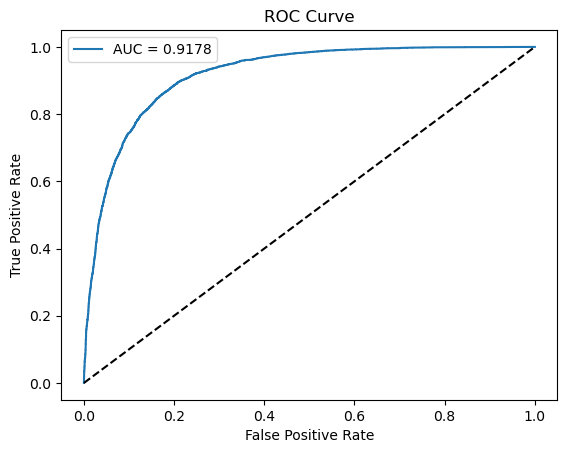

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
#initializing model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, Y_train) #fit to trianing data

#predicting on the test data 
Y_pred = log_reg.predict(X_test) #uses default threshold of 0.5 since data not imbalanced (seen by counts)we can stick w this
Y_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC for those event_type=1


acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

print("=== Logistic Regression ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


# y_proba = predict_proba()[:,1]
auc = roc_auc_score(Y_test, Y_proba)
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line = random guessing AUC 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#“We scaled features for SVM because it’s distance-based, 
# but for Logistic Regression we used raw features since scaling 
# doesn’t affect predicted probabilities and regularization was not critical.”

                              Feature    Weight
35          KSFWVariables__bohoo1__bc  4.694104
49   KSFWVariables__bohoo1__cmFS1__bc  4.694104
47  KSFWVariables__bohso24__cmFS1__bc  3.091987
24         CleoConeCS__bo9__cmROE__bc  2.804084
41  KSFWVariables__bohso04__cmFS1__bc  2.645457
23         CleoConeCS__bo8__cmROE__bc  2.269988
22         CleoConeCS__bo7__cmROE__bc  1.991259
57                             thrust  1.976222
16         CleoConeCS__bo1__cmROE__bc  1.908852
21         CleoConeCS__bo6__cmROE__bc  1.842305
17         CleoConeCS__bo2__cmROE__bc  1.801314
20         CleoConeCS__bo5__cmROE__bc  1.790645
19         CleoConeCS__bo4__cmROE__bc  1.618614
18         CleoConeCS__bo3__cmROE__bc  1.484320
44  KSFWVariables__bohso14__cmFS1__bc  1.426940
34          KSFWVariables__bohoo0__bc  1.201993
48   KSFWVariables__bohoo0__cmFS1__bc  1.201993
38          KSFWVariables__bohoo4__bc  1.124741
52   KSFWVariables__bohoo4__cmFS1__bc  1.124741
43  KSFWVariables__bohso12__cmFS1__bc  0

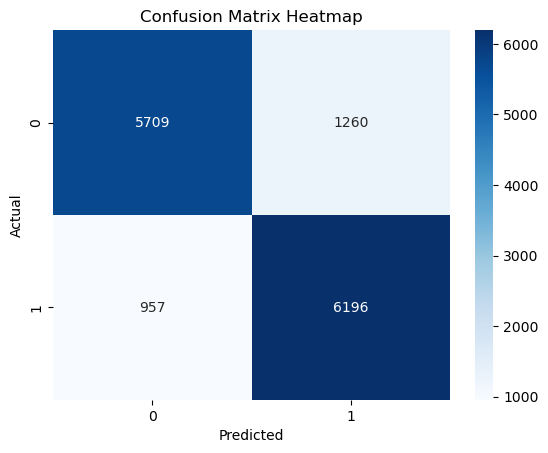

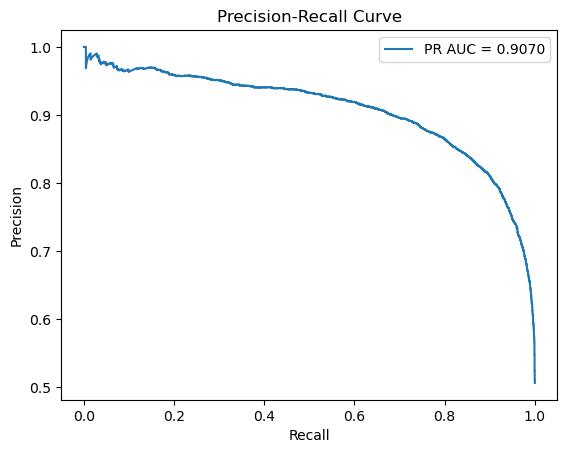

In [ ]:
# GOTTA SEE WHAT THIS IS IDK 
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Weight': log_reg.coef_[0]})
print(coef_df.sort_values(by='Weight', ascending=False))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


=== Logistic Regression (Scaled Data) ===
Accuracy: 0.8410
ROC AUC: 0.9155
Confusion Matrix:
 [[5705 1264]
 [ 982 6171]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8531    0.8186    0.8355      6969
           1     0.8300    0.8627    0.8460      7153

    accuracy                         0.8410     14122
   macro avg     0.8416    0.8407    0.8408     14122
weighted avg     0.8414    0.8410    0.8409     14122



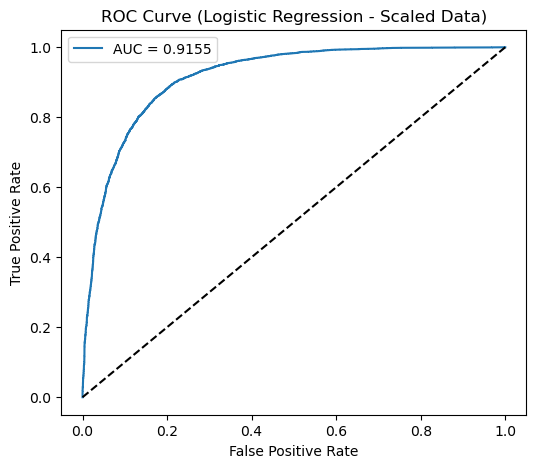

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1️⃣ Scale the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 2️⃣ Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# 3️⃣ Fit to training data
log_reg.fit(X_train_scaled, Y_train)

# 4️⃣ Predict on test data
Y_pred = log_reg.predict(X_test_scaled)               # 0/1 labels (threshold=0.5)
Y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # probabilities for positive class (1)

# 5️⃣ Compute metrics
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

print("=== Logistic Regression (Scaled Data) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# 6️⃣ ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal = random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression - Scaled Data)')
plt.legend()
plt.show()



=== Random Forest ===
Accuracy: 0.8600
ROC AUC: 0.9322
Confusion Matrix:
 [[5847 1122]
 [ 855 6298]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8724    0.8390    0.8554      6969
           1     0.8488    0.8805    0.8643      7153

    accuracy                         0.8600     14122
   macro avg     0.8606    0.8597    0.8599     14122
weighted avg     0.8605    0.8600    0.8599     14122



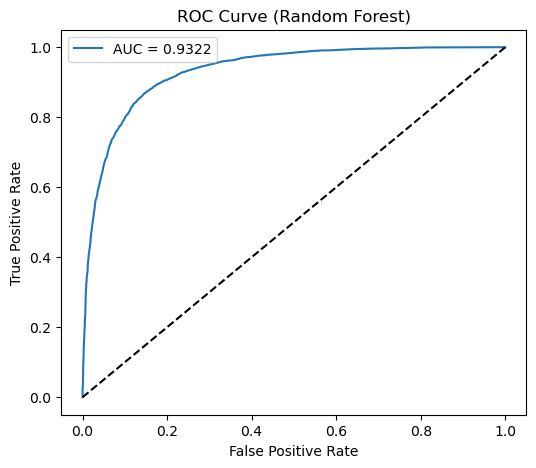

Top 10 important features:
                              Feature  Importance
0                                 R2    0.149115
2                           thrustOm    0.068260
36         KSFWVariables__bohoo2__bc    0.046715
50  KSFWVariables__bohoo2__cmFS1__bc    0.041215
57                            thrust    0.039219
1                           thrustBm    0.036404
3                            cosTBTO    0.035943
54                      foxWolframR2    0.032904
26        KSFWVariables__bohso02__bc    0.029025
7                CleoConeCS__bo1__bc    0.024701


<Axes: xlabel='Feature'>

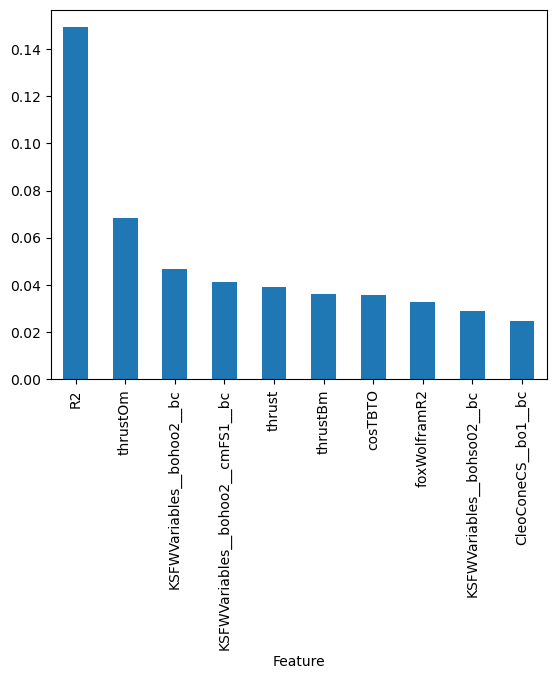

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300,random_state=42,class_weight='balanced')
#fit to training data (raw features, no scaling needed)
rf.fit(X_train, Y_train)

#prediction
Y_pred = rf.predict(X_test)
Y_proba = rf.predict_proba(X_test)[:, 1]  # probability of positive class (1)


acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

print("=== Random Forest ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 important features:\n", feature_importance.head(10))
feature_importance.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)

=== Support Vector Machine (SVM) ===
Accuracy: 0.8626
ROC AUC: 0.9349
Confusion Matrix:
 [[5808 1161]
 [ 780 6373]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8816    0.8334    0.8568      6969
           1     0.8459    0.8910    0.8678      7153

    accuracy                         0.8626     14122
   macro avg     0.8638    0.8622    0.8623     14122
weighted avg     0.8635    0.8626    0.8624     14122



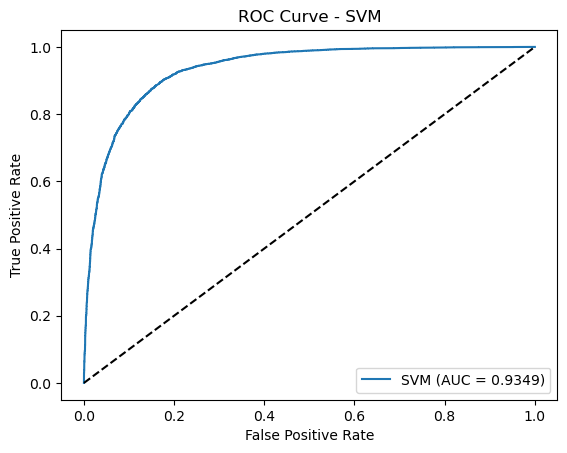

In [42]:
#SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',probability=True,class_weight='balanced',random_state=42)            

# Fit model on scaled data (SVM is distance-based → scaling is crucial) to get probabilities for ROC-AUC
#handle any class imbalance
# #reproducibility  #RBF kernel = non-linear boundary

svm_model.fit(X_train_scaled, Y_train)

# Predict on test data
Y_pred = svm_model.predict(X_test_scaled)          # class labels (0/1)
Y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class 1

# Evaluate performance
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

# Print results
print("=== Support Vector Machine (SVM) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal = random guessing (AUC = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


=== XGBoost ===
Accuracy: 0.8795
ROC AUC: 0.9467
Confusion Matrix:
 [[6035  934]
 [ 768 6385]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8871    0.8660    0.8764      6969
           1     0.8724    0.8926    0.8824      7153

    accuracy                         0.8795     14122
   macro avg     0.8797    0.8793    0.8794     14122
weighted avg     0.8797    0.8795    0.8794     14122



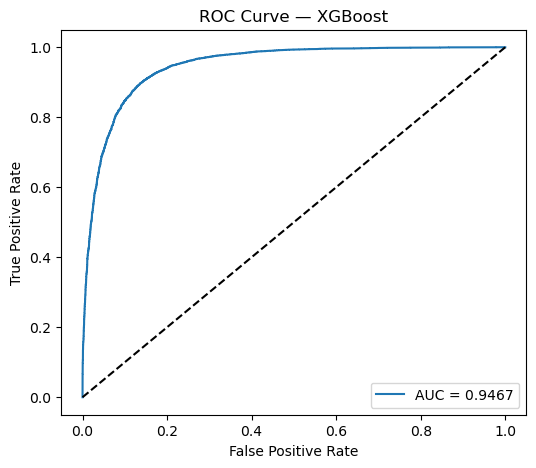

Top 10 important features:
                        Feature  Importance
0                           R2    0.446455
7          CleoConeCS__bo1__bc    0.031988
16  CleoConeCS__bo1__cmROE__bc    0.026503
1                     thrustBm    0.023036
31  KSFWVariables__bohso20__bc    0.020246
34   KSFWVariables__bohoo0__bc    0.017964
6     KSFWVariables__bomm2__bc    0.016884
5      KSFWVariables__boet__bc    0.015454
29  KSFWVariables__bohso12__bc    0.015229
32  KSFWVariables__bohso22__bc    0.014664


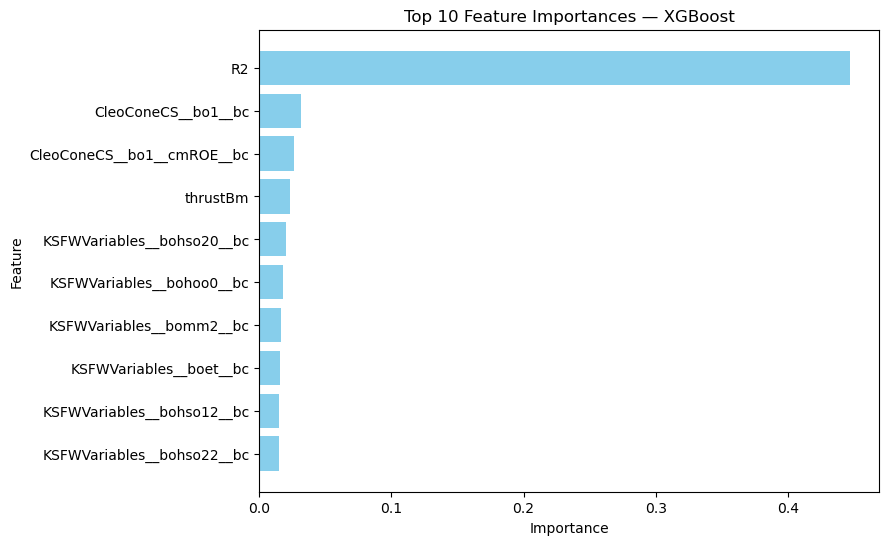

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    random_state=42,
    scale_pos_weight=len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]), #imporve sensitivity to minority class
    eval_metric='logloss'
)
# Fit the model
xgb.fit(X_train, Y_train)

# Predict
Y_pred = xgb.predict(X_test)
Y_proba = xgb.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

print("=== XGBoost ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — XGBoost')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 important features:\n", feature_importance.head(10))

# Bar graph of top features
plt.figure(figsize=(8,6))
top_n = 10
plt.barh(
    feature_importance['Feature'].head(top_n)[::-1],
    feature_importance['Importance'].head(top_n)[::-1],
    color='skyblue'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances — XGBoost')
plt.show()



Original number of features: 59
Reduced number of features after PCA: 23


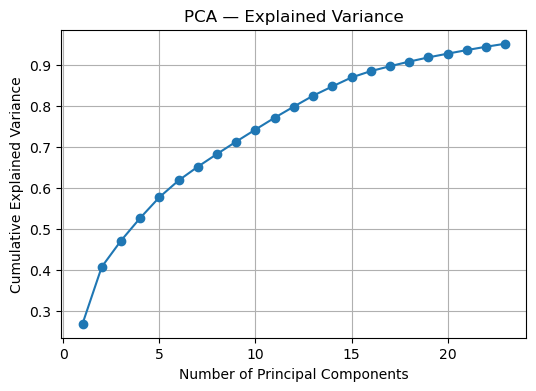

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Scale features (important for PCA)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 2️⃣ Fit PCA to capture 95% variance
pca = PCA(n_components=0.95)  # automatically choose #components to retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# 3️⃣ Optional: plot cumulative explained variance
explained_var = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA — Explained Variance')
plt.grid(True)
plt.show()


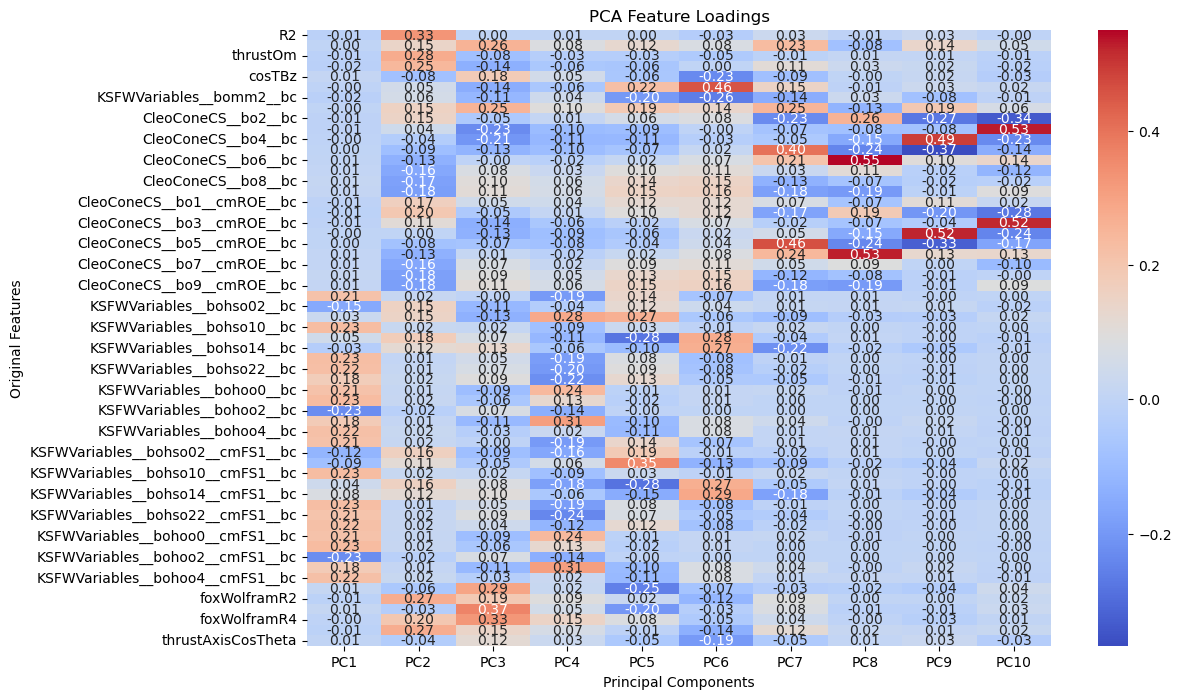

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1️⃣ Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# 2️⃣ Fit PCA (keep, e.g., first 10 components)
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 3️⃣ Create a DataFrame of PCA loadings (feature contributions)
loadings = pd.DataFrame(
    pca.components_.T,       # transpose to get features as rows
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X_train.columns
)

# 4️⃣ Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Feature Loadings')
plt.ylabel('Original Features')
plt.xlabel('Principal Components')
plt.show()


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}")
print(f"PCA components: {X_train_pca.shape[1]}")


Original features: 59
PCA components: 23


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_pca, Y_train)

Y_pred_lr = log_reg.predict(X_test_pca)
Y_proba_lr = log_reg.predict_proba(X_test_pca)[:,1]

# Metrics
acc_lr = accuracy_score(Y_test, Y_pred_lr)
auc_lr = roc_auc_score(Y_test, Y_proba_lr)
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
cr_lr = classification_report(Y_test, Y_pred_lr, digits=4)

print("=== Logistic Regression with PCA ===")
print(f"Accuracy: {acc_lr:.4f}, ROC AUC: {auc_lr:.4f}")
print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", cr_lr)


=== Logistic Regression with PCA ===
Accuracy: 0.8213, ROC AUC: 0.9008
Confusion Matrix:
 [[5583 1386]
 [1138 6015]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8307    0.8011    0.8156      6969
           1     0.8127    0.8409    0.8266      7153

    accuracy                         0.8213     14122
   macro avg     0.8217    0.8210    0.8211     14122
weighted avg     0.8216    0.8213    0.8212     14122



In [52]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_pca, Y_train)

Y_pred_svm = svm_model.predict(X_test_pca)
Y_proba_svm = svm_model.predict_proba(X_test_pca)[:,1]

# Metrics
acc_svm = accuracy_score(Y_test, Y_pred_svm)
auc_svm = roc_auc_score(Y_test, Y_proba_svm)
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
cr_svm = classification_report(Y_test, Y_pred_svm, digits=4)

print("=== SVM with PCA ===")
print(f"Accuracy: {acc_svm:.4f}, ROC AUC: {auc_svm:.4f}")
print("Confusion Matrix:\n", cm_svm)
print("Classification Report:\n", cr_svm)


=== SVM with PCA ===
Accuracy: 0.8439, ROC AUC: 0.9181
Confusion Matrix:
 [[5753 1216]
 [ 988 6165]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8534    0.8255    0.8392      6969
           1     0.8353    0.8619    0.8484      7153

    accuracy                         0.8439     14122
   macro avg     0.8443    0.8437    0.8438     14122
weighted avg     0.8442    0.8439    0.8439     14122



AttributeError: 'Axes' object has no attribute 'le'

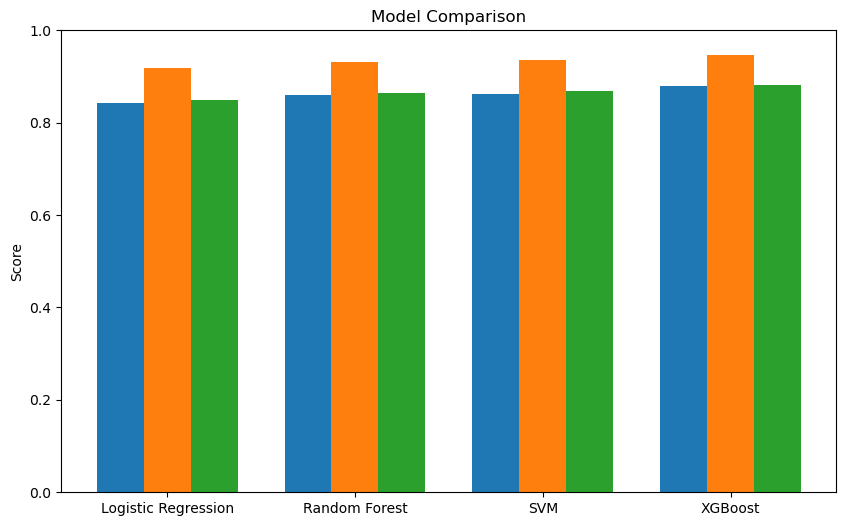

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
accuracy = [0.8430, 0.8600, 0.8626, 0.8795]
roc_auc = [0.9178, 0.9322, 0.9349, 0.9467]
f1_class1 = [0.8482, 0.8643, 0.8678, 0.8824]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, roc_auc, width, label='ROC-AUC')
ax.bar(x + width, f1_class1, width, label='F1-score (class 1)')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Model Comparison')


[LightGBM] [Info] Number of positive: 28612, number of negative: 27872
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15045
[LightGBM] [Info] Number of data points in the train set: 56484, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506551 -> initscore=0.026204
[LightGBM] [Info] Start training from score 0.026204
=== LightGBM ===
Accuracy: 0.8812
ROC AUC: 0.9491
Confusion Matrix:
 [[6019  950]
 [ 727 6426]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8922    0.8637    0.8777      6969
           1     0.8712    0.8984    0.8846      7153

    accuracy                         0.8812     14122
   macro avg     0.8817    0.8810    0.8812     14122
weighted avg     0.8816    0.8812    0.8812     14122



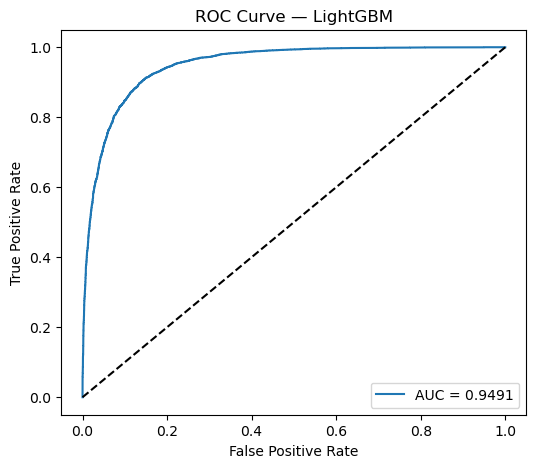

Top 10 important features:
                        Feature  Importance
7          CleoConeCS__bo1__bc         549
1                     thrustBm         385
16  CleoConeCS__bo1__cmROE__bc         340
0                           R2         310
4                       cosTBz         301
8          CleoConeCS__bo2__bc         280
31  KSFWVariables__bohso20__bc         275
5      KSFWVariables__boet__bc         246
34   KSFWVariables__bohoo0__bc         238
29  KSFWVariables__bohso12__bc         210


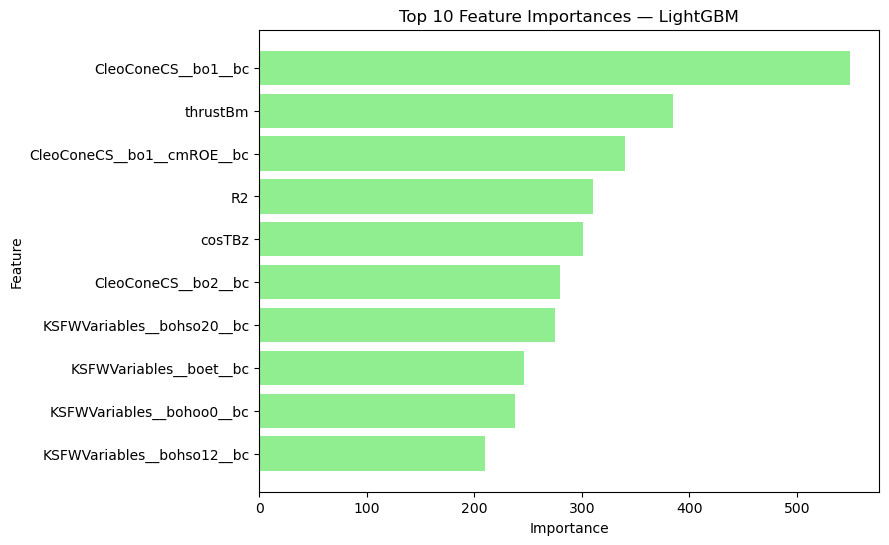

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize LightGBM
lgbm = LGBMClassifier(
    n_estimators=300,
    random_state=42,
    scale_pos_weight=len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]),  # handle class imbalance
)

# Fit the model
lgbm.fit(X_train, Y_train)

# Predict
Y_pred = lgbm.predict(X_test)
Y_proba = lgbm.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred, digits=4)
auc = roc_auc_score(Y_test, Y_proba)

print("=== LightGBM ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — LightGBM')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 important features:\n", feature_importance.head(10))

# Bar graph of top features
plt.figure(figsize=(8,6))
top_n = 10
plt.barh(
    feature_importance['Feature'].head(top_n)[::-1],
    feature_importance['Importance'].head(top_n)[::-1],
    color='lightgreen'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances — LightGBM')
plt.show()
